In [1]:
# To build a model for training and testing:

In [2]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [3]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:

dir_name_train_plain = 'data/train/plain'
dir_name_train_pothole = 'data/train/pothole'


In [6]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()


Trainned data for plain :

 ====== Images in:  data/train/plain
images_count:	367
min_width:	160
max_width:	5760
min_height:	120
max_height:	3840



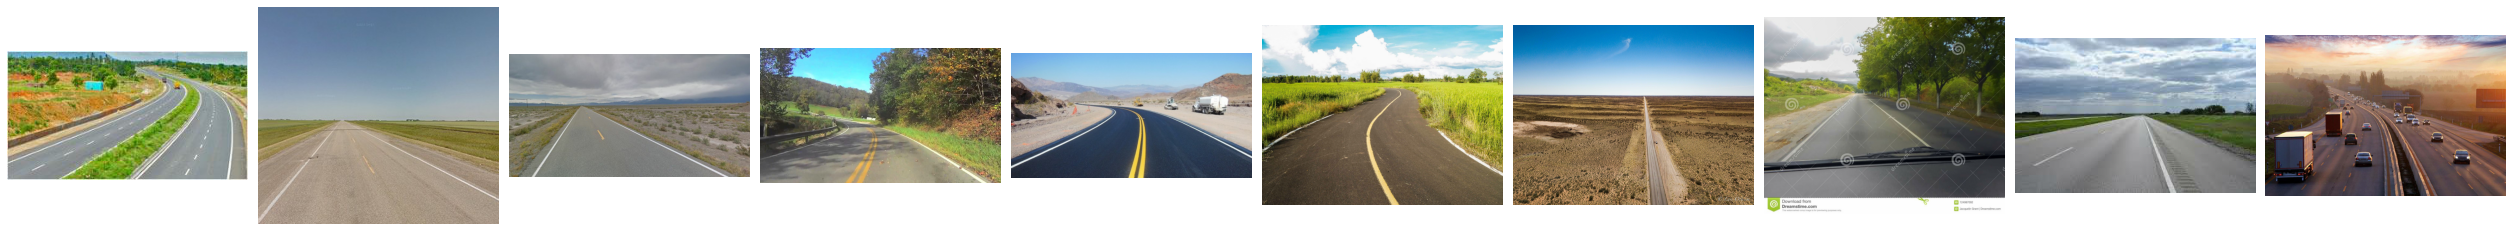

In [26]:
print("")
print("Trainned data for plain :")
print("")
Images_details(dir_name_train_plain)
print("")
plot_images(dir_name_train_plain, 10)


Trainned data for pothole:

 ====== Images in:  data/train/pothole
images_count:	357
min_width:	169
max_width:	5760
min_height:	168
max_height:	3840



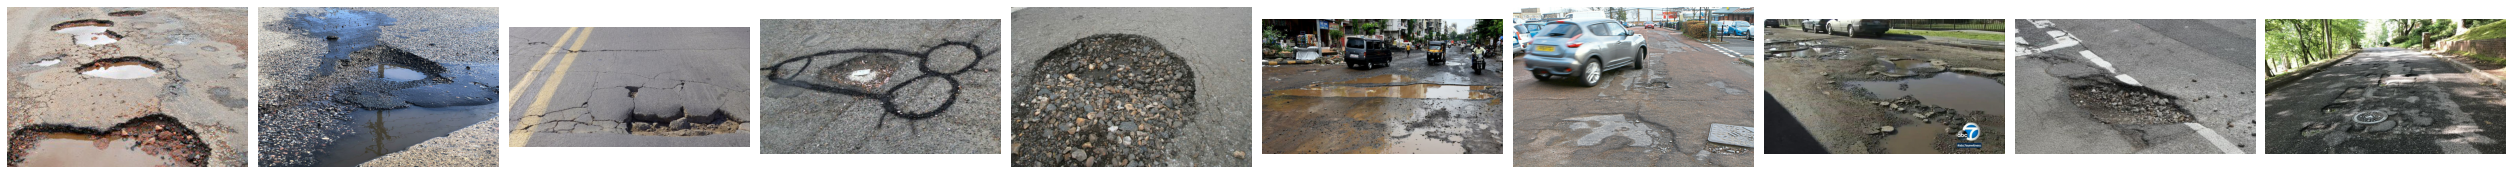

In [27]:
print("")
print("Trainned data for pothole:")
print("")
Images_details(dir_name_train_pothole)
print("")
plot_images(dir_name_train_pothole, 10)

In [28]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))

In [13]:
Classifier.add(Dense(2, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
training_set=train_datagen.flow_from_directory('data/train',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('data/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 724 images belonging to 2 classes.
Found 305 images belonging to 2 classes.


In [15]:
epochs = 10
batch_size = 32

In [16]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

NameError: name 'training_set' is not defined

In [18]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [19]:
graph()

NameError: name 'history' is not defined